<h1> Nhận dạng bình luận tiêu cực </h1>
<h4> Trong notebook này, chúng ta sẽ: <h4>
<ul>
  <li> Tìm hiểu sơ bộ về Tiếng Việt </li>
  <li> Tìm hiểu về cách tiền xử lý thông tin dạng chuỗi (string) </li>
  <li> Vector hóa chuỗi
  <li> Xây dựng mô hình đoán nhận bình luận tiêu cực sử dụng Keras, khám phá mô hình LSTM </li>
</ul>

<p> Xin cảm ơn rất nhiều vì những kiến thức mà anh Trần Công Nghĩa và anh Lê Quốc Hưng đã chia sẻ thông qua blog streetcodevn.com </p> 
<p> My heroes <3 </p>

<h1> Sơ bộ </h1>
<p> Phát biểu theo góc nhìn của máy học (Machine Learning) thì nhận dạng bình luận tiêu cực là bài toán phân lớp cảm xúc dựa trên văn bản ngôn ngữ tự nhiên. Đầu vào của bài toán là một câu hay một đoạn văn bản, còn đầu ra là các giá trị xác suất (điểm số) của N lớp cảm xúc mà ta cần xác định. </p>
<p> 

<h3> 1. Tìm hiểu sơ bộ về tiếng Việt </h3>
<p> Trước hết, chúng ta cần biết một số điều về tiếng Việt: </p>
<p> Đầu tiên, tiếng Việt có tính chất đơn lập. Tính đơn lập này được thể hiện đầu tiên qua việc các từ của tiếng Việt thường chỉ bao gồm từ một đến 2 tiếng. Điều này đồng nghĩa với việc tỉ lệ tiếng trên từ của tiếng Việt khá thấp, gần bằng 1.
<p> Tiếp theo, tính chất đơn lập được thể hiện qua việc tiếng Việt không có khái niệm chia dạng từ (conjugation). Trong tiếng Anh, chúng ta có thể biểu diễn thì của tiếng Anh thông qua cách chia động từ: to dream (nguyên thể) dream/dreams (thể trần thuật) -> dream (thể giả định) -> dreaming (phân từ I) -> dreamed (thể quá khứ) -> dreamt (thể phân từ II),...
<p> Thế nhưng, trong tiếng Việt, hư từ và vị trí, trật tự từ đóng vai trò làm rõ quan hệ ngữ pháp cũng như ý nghĩa ngữ pháp của từ và của câu. Với cùng ví dụ đó, ta có thể biểu diễn thì của hành động trong câu thông qua các bổ ngữ, như đã, đang, sẽ, đã từng,...
<p> Một điểm đặc trưng nữa là tính hình tiết; hạt nhân cơ bản của từ vựng là các từ đơn tiết. Vì thế mà ranh giới giữa âm tiết, tiếng và từ không rõ ràng (ví dụ: trong tiếng Việt, "nhà" vừa là một tiếng, mà cũng vừa là một từ). Cũng vì vậy mà từ ghép và cụm từ cũng khó phân biệt. Đặc biệt, chúng ta còn có các khái niệm như từ ghép đẳng lập, từ ghép chính phụ, từ láy, các tiếng trong từ có thể có mối quan hệ về nghĩa (như từ ghép) hay mối quan hệ về âm (như từ láy). Đặc biệt, với từ láy, có thể được tạo bởi 2 đến 3 tiếng nhưng bắt buộc nhiều nhất một từ có ý nghĩa.
<p> Cuối cùng, khái niệm "các từ loại" là rất mơ hồ. Ví dụ: "cưa" vừa là dụng cụ để xẻ gỗ, vừa chỉ hành động cắt xẻ gỗ. Nguyên nhân do cấu trúc của những từ có ý nghĩa đối tượng, tính chất, hành động,...không tách biệt nhau.

<p> Các tính chất này của tiếng Việt sẽ có ảnh hưởng sâu sắc tới cách chúng ta xử lý dữ liệu đầu vào.

<p> Chúng ta hãy cũng nhìn vào các công việc thông thường khi xử lý dữ liệu đầu vào với ngôn ngữ tiếng Anh: </p>
<ol>
  <li> Loại bỏ các ký tự không phải dạng ký tự (eg. Các dấu câu)
  <li> Chuyển các kí tự thành dạng chữ cái thường
  <li> Chuyển các câu thành danh sách các từ (Tokenization)
  <li> Loại bỏ các hư từ (stop-words)
  <li> Cắt từ (Stemming) hoặc tìm gốc từ (Lemmatization)
  <li> Chuyển các từ thành tensors (Vectorization)
</ol>

<p> Trong các công đoạn trên, chỉ có công đoạn thứ 5 chúng ta cần làm khác so với tiếng Anh. Do tiếng Việt có bản chất monosyllabic, quá trình tách từ sẽ được thực hiện qua việc nối tiếng (bằng dấu '_' theo ý nghĩa) và tách tiếng (thông qua dấu ' ')

In [ ]:
from google.colab import drive
import string
drive.mount('/content/drive')

Mounted at /content/drive


<p> Chúng ta sẽ không tách từ dựa trên các dấu cách (như tiếng Anh) mà sẽ tách từ dựa trên ý nghĩa. Đây là một công việc rất khó, và chúng ta sẽ sử dụng công trình nghiên cứu của Nguyen. Dat, Nguyen. Dai, Dras. Mark, Johnson. Mark. Phần mềm của họ được viết trong ngôn ngữ Java, nên ta sẽ sử dụng implementation của Pham. Vinh, được viết bằng ngôn ngữ Python.

In [ ]:
!git clone https://github.com/Sudo-VP/Vietnamese-Word-Segmentation-Python.git

Cloning into 'Vietnamese-Word-Segmentation-Python'...
remote: Enumerating objects: 118, done.
remote: Counting objects: 100% (118/118), done.
remote: Compressing objects: 100% (90/90), done.
remote: Total 118 (delta 33), reused 96 (delta 16), pack-reused 0
Receiving objects: 100% (118/118), 905.21 KiB | 5.00 MiB/s, done.
Resolving deltas: 100% (33/33), done.


In [ ]:
%cd "/content/Vietnamese-Word-Segmentation-Python"
!python setup.py install
!python -m pip install .

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for vws: filename=vws-0.0.1-py3-none-any.whl size=554050 sha256=0e8ef634975939f87ef4b9880880d3fb6b82ed5c4c98033e7071fc814ac8e90e
  Stored in directory: /root/.cache/pip/wheels/2f/88/2a/869ab89724061d03607181dd71071221ebb4df266644839a12
Successfully built vws
  Attempting uninstall: vws
    Found existing installation: vws 0.0.1
    Uninstalling vws-0.0.1:
      Successfully uninstalled vws-0.0.1


In [ ]:
from vws import RDRSegmenter, Tokenizer
rdrsegment = RDRSegmenter.RDRSegmenter()
tokenizer = Tokenizer.Tokenizer()

Hàm get_paths() được sử dụng để lấy đường dẫn của tất cả các file có đuôi .txt. Hàm load_text() được sử dụng để đọc file và trả về nội dung file dưới dạng các string.

In [ ]:
import os
def get_paths(PATH):
  paths = []
  for root, subFolder, files in os.walk(PATH):
      for item in files:
          if item.endswith(".txt") :
              fileNamePath = str(os.path.join(root,item))
              paths.append(fileNamePath)
  return paths

In [ ]:
def load_text(filename):
	file = open(filename, 'r')
	text = file.read()
	file.close()
	return text

Ở bên dưới, ta đang load danh sách các hư từ từ một file txt. File txt này là kết quả của Le. Duyet, các bạn có thể tải từ trang web https://github.com/stopwords/vietnamese-stopwords

In [ ]:
stop_words = load_text("/content/drive/MyDrive/Dataset_Sentiment_Analysis/stop_words/vietnamese-stopwords-dash.txt")
stop_words = stop_words.split()

In [ ]:
print(stop_words)

['a_lô', 'a_ha', 'ai', 'ai_ai', 'ai_nấy', 'ai_đó', 'alô', 'amen', 'anh', 'anh_ấy', 'ba', 'ba_ba', 'ba_bản', 'ba_cùng', 'ba_họ', 'ba_ngày', 'ba_ngôi', 'ba_tăng', 'bao_giờ', 'bao_lâu', 'bao_nhiêu', 'bao_nả', 'bay_biến', 'biết', 'biết_bao', 'biết_bao_nhiêu', 'biết_chắc', 'biết_chừng_nào', 'biết_mình', 'biết_mấy', 'biết_thế', 'biết_trước', 'biết_việc', 'biết_đâu', 'biết_đâu_chừng', 'biết_đâu_đấy', 'biết_được', 'buổi', 'buổi_làm', 'buổi_mới', 'buổi_ngày', 'buổi_sớm', 'bà', 'bà_ấy', 'bài', 'bài_bác', 'bài_bỏ', 'bài_cái', 'bác', 'bán', 'bán_cấp', 'bán_dạ', 'bán_thế', 'bây_bẩy', 'bây_chừ', 'bây_giờ', 'bây_nhiêu', 'bèn', 'béng', 'bên', 'bên_bị', 'bên_có', 'bên_cạnh', 'bông', 'bước', 'bước_khỏi', 'bước_tới', 'bước_đi', 'bạn', 'bản', 'bản_bộ', 'bản_riêng', 'bản_thân', 'bản_ý', 'bất_chợt', 'bất_cứ', 'bất_giác', 'bất_kì', 'bất_kể', 'bất_kỳ', 'bất_luận', 'bất_ngờ', 'bất_nhược', 'bất_quá', 'bất_quá_chỉ', 'bất_thình_lình', 'bất_tử', 'bất_đồ', 'bấy', 'bấy_chầy', 'bấy_chừ', 'bấy_giờ', 'bấy_lâu', 'bấy_lâ

Với bài toán nhận diện cảm xúc trong văn bản, điều quan trọng chính là lọc được các từ quan trọng, giúp ta suy được ra sắc thái của câu.

Chúng ta sẽ xây dựng từ điển để lưu lại những từ quan trọng đó. Từ điển sẽ còn giúp ích rất lớn cho chúng ta không chỉ ở quá trình huấn luyện, mà còn ở quá trình đoán nhận

In [ ]:
import string
def docs_to_words(doc, tokenize=False):
  # token hoa cac file
  w = doc.translate(str.maketrans('', '', string.punctuation.replace('_', ''))).lower()
  if (tokenize):
    w = rdrsegment.segmentRawSentences(tokenizer, w)
  tokens = w.split()
  # loai bo cac hu tu
  tokens = [w for w in tokens if not w in stop_words]
  # loai bo cac thanh phan chua ky tu khong phai chu cai
  # thay the dau _ bang to hop cac phim khong co trong tieng Viet
  tokens = [w.replace("_", "ZWJ") for w in tokens]
  tokens = [word for word in tokens if word.isalpha()]
  tokens = [w.replace("ZWJ", "_") for w in tokens]
  # lay nhung token co nhieu hon 1 ky tu
  tokens = [word for word in tokens if len(word) > 1]
  return tokens

In [ ]:
d = load_text("/content/drive/MyDrive/Dataset_Sentiment_Analysis/dataset/test/neg/29.txt")
print(docs_to_words(d))

['quán', 'comments', 'khen', 'chỗ', 'tối', 'hôm_qua', 'rủ', 'mấy', 'đồng_nghiệp', 'thử', 'cảm_nhận', 'quán', 'bàn_ghế', 'sạch_sẽ', 'không_gian', 'ấm_áp', 'vắng_tanh', 'phục_vụ', 'món', 'chậm', 'quán', 'giải_thích', 'đun', 'nóng', 'gọi', 'gọi', 'món', 'bò', 'ngâm', 'dấm', 'đợi', 'lẩu', 'bắp', 'bò', 'nhạt', 'khô', 'miếng', 'ngấm', 'miếng', 'tóm_lại', 'ngon', 'lẩu', 'ban_đầu', 'gọi', 'nồi', 'lẩu', 'cua_đồng', 'chủ', 'quán', 'gật_gật', 'phút', 'nhân_viên', 'quán', 'nồi', 'lẩu', 'bếp', 'nồi', 'nồi', 'chủ', 'quán', 'xác_nhận', 'uh', 'nồi', 'lẩu', 'thịt', 'bò', 'úc', 'sườn', 'sụn', 'chả', 'rau_sống', 'bánh_đa', 'kèm', 'số_lượng', 'đồ_ăn', 'đắt', 'giá', 'tiền', 'nồi', 'lẩu', 'cua_đồng', 'lưng_lửng', 'bụng', 'ngon', 'lẩu', 'chất_lượng', 'đồ_ăn', 'thất_vọng', 'ngon', 'ngất_trời', 'comments', 'nồi', 'lẩu', 'hết_sức', 'bình_thường', 'lẩu', 'nhạt_nhẽo', 'me', 'dở_hơi', 'đổ', 'đọc', 'comment', 'hy_vọng', 'chán', 'lẩu', 'bê', 'ngon', 'chốt', 'quán', 'món', 'lạc', 'rang', 'muối', 'ớt', 'ngon', 'giá_mà

In [ ]:
from IPython.display import clear_output
from tqdm import tqdm
def vocabularize(filename, vocab, tokenize=False):
	doc = load_text(filename)
	tokens = docs_to_words(doc, tokenize)
	vocab.update(tokens)
 
# load all docs in a directory
def process_docs_for_vocab(root_dir, vocab, tokenize=False):
	# walk through all files in the folder
  directories = get_paths(root_dir)
  length = len(directories)
  count = 0
  for filename in tqdm(directories):
    vocabularize(filename, vocab, tokenize)

In [ ]:
from collections import Counter
import string
# define vocab
vocab = Counter()
vocab1 = Counter()
vocab2 = Counter()
# add all docs to vocab
process_docs_for_vocab('/content/drive/MyDrive/Dataset_Sentiment_Analysis/dataset/test', vocab)
process_docs_for_vocab('/content/drive/MyDrive/Dataset_Sentiment_Analysis/dataset/validate', vocab)
process_docs_for_vocab('/content/drive/MyDrive/Dataset_Sentiment_Analysis/dataset/train/neg', vocab1)
process_docs_for_vocab('/content/drive/MyDrive/Dataset_Sentiment_Analysis/dataset/train/pos', vocab2)
vocab = vocab + vocab1 + vocab2
# print the size of the vocab
print(len(vocab))
# print the top words in the vocab
print(vocab.most_common(50))

100%|██████████| 15008/15008 [04:59<00:00, 50.03it/s] 


41874
[('quán', 55439), ('ngon', 41634), ('món', 28541), ('đi', 26720), ('ko', 26303), ('nhân_viên', 22479), ('uống', 18029), ('phục_vụ', 17359), ('hơi', 15920), ('bánh', 15256), ('lắm', 14587), ('giá', 14294), ('gọi', 13992), ('không_gian', 13548), ('trà', 12983), ('ng', 11764), ('mấy', 10593), ('vị', 10299), ('chỗ', 9863), ('thử', 9825), ('đồ_ăn', 9592), ('đẹp', 9256), ('kem', 8904), ('đồ', 8551), ('xe', 8357), ('đông', 8135), ('bàn', 8028), ('thịt', 7921), ('ghé', 7701), ('đc', 7590), ('mua', 7122), ('tiền', 6966), ('ly', 6873), ('nướng', 6787), ('nhiệt_tình', 6742), ('sữa', 6614), ('nh', 6607), ('chất_lượng', 6532), ('rẻ', 6466), ('bò', 6347), ('gà', 6307), ('giá_cả', 6162), ('thơm', 5933), ('cơm', 5756), ('kêu', 5679), ('xong', 5674), ('chủ', 5394), ('ok', 5304), ('la', 5159), ('dễ_thương', 5001)]


Ta sẽ lọc ra những từ xuất hiện ít nhất 2 lần, rồi lưu lại vào file

In [ ]:
# keep tokens with a min occurrence
min_occurrence = 2
tokens = [k for k,c in vocab.items() if c >= min_occurrence]

def save_list(lines, filename):
	data = '\n'.join(lines)
	file = open(filename, 'w')
	file.write(data)
	file.close()
 
# save tokens to a vocabulary file
save_list(tokens, '/content/drive/MyDrive/Dataset_Sentiment_Analysis/vocab.txt')

In [ ]:
vocab_filename = '/content/drive/MyDrive/Dataset_Sentiment_Analysis/vocab.txt'
vocab = load_text(vocab_filename)
vocab = vocab.split()
vocab = set(vocab)

<h3> Chuẩn bị dữ liệu để đưa vào mô hình học máy:

Ta sẽ nhập những thư viện cần thiết vào

In [ ]:
import keras
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Flatten
from keras.layers import Embedding
import numpy as np

Tiếp theo, ta sẽ bắt đầu làm sạch dữ liệu trong dataset, và chỉ lấy những từ xuất hiện trong từ điển

In [ ]:
def clean_doc(doc, vocab, tokenize=False):
  # token hoa cac file
  w = doc.translate(str.maketrans('', '', string.punctuation.replace('_', ''))).lower()
  if (tokenize):
    w = rdrsegment.segmentRawSentences(tokenizer, w)
  tokens = w.split()
  # lay nhung token co nhieu hon 1 ky tu
  tokens = [w for w in tokens if w in vocab]
  tokens = ' '.join(tokens)
  return tokens

Ta sẽ xuất dataset dưới dạng list các string.

In [ ]:
def prep_dataset(root_dir, vocab, tokenize=False):
	# walk through all files in the folder
  documents = list()
  directories = get_paths(root_dir)
  length = len(directories)
  for filename in tqdm(directories):
    doc = load_text(filename)
    tokens = clean_doc(doc, vocab)
    documents.append(tokens)
  return documents

In [ ]:
# load all training reviews
positive_docs = prep_dataset('/content/drive/MyDrive/Dataset_Sentiment_Analysis/dataset/train/pos', vocab)
negative_docs = prep_dataset('/content/drive/MyDrive/Dataset_Sentiment_Analysis/dataset/train/neg', vocab)
train_docs = negative_docs + positive_docs

100%|██████████| 15000/15000 [00:33<00:00, 447.98it/s]


In [ ]:
negative_docs[0]

'quán đồ nhật quán bình thuờng đắt món dừng tuơng đối giá lợi_thế duy_nhất quán khu_phố cổ nhà_thờ tiện ăn_uống đi_lại chẳng'

Giờ, ta sẽ vector hóa các câu trong bộ dữ liệu train. 

Chúng ta sử dụng 2 hàm sau:

fit_on_texts: Tạo ra một từ điển riêng cho mô hình học máy, index của từ điển này sẽ dựa trên tần suất xuất hiện của từ. Từ xuất hiện càng nhiều, index sẽ càng thấp. Index sẽ bắt đầu từ 1, index 0 được dành riêng để phục vụ padding. Mỗi một từ sẽ có một index riêng biệt.

texts_to_sequences: chuyển các từ trong câu thành một chuỗi các số nguyên. Cách chuyển được dựa trên từ điển sinh ra từ hàm fit_on_texts.

In [ ]:
# create the tokenizer
k_tokenizer = keras.preprocessing.text.Tokenizer()
# fit the tokenizer on the documents
k_tokenizer.fit_on_texts(train_docs)

Các văn bản khác nhau sẽ có độ dài khác nhau. Ta sẽ cần chọn một độ dài hợp lý. Nếu để văn bản quá dài, chúng ta có thể tạo ra các vector thưa, khiến hiệu năng của máy học giảm. Nếu cắt văn bản quá ngắn, ta có thể sẽ cắt mất thông tin. Chính vì vậy, ta sẽ thử thống kê độ dài của văn bản. Biểu đồ bên dưới sẽ cho ta thấy phân bố dộ dài văn bản. 

In [ ]:
# sequence encode
encoded_docs = k_tokenizer.texts_to_sequences(train_docs)

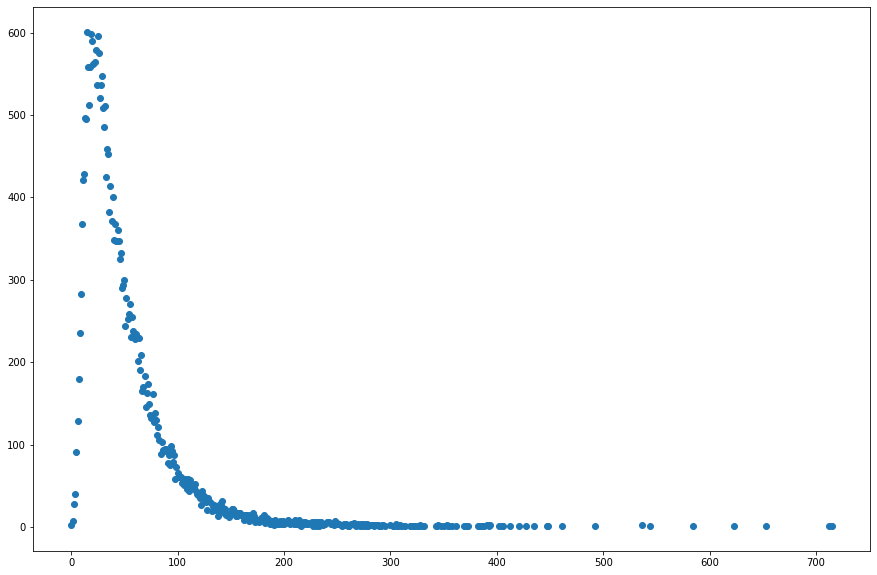

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
a = plt.figure(figsize=(15,10))
x = [len(i) for i in encoded_docs]
stat = Counter(x)
X, Y = [x for x, y in stat.items()], [y for x, y in stat.items()]
plt.scatter(X, Y)
plt.show()

Ta thấy rằng các văn bản có độ tập trung lớn nhất trong khoảng từ 0 -> 150 từ. Ta sẽ chọn kích cỡ là 200. Nếu dài quá, ta sẽ cắt ngắn văn bản đi. Nếu ngắn quá, ta sẽ thêm padding vào cuối văn bản. Tất cả sẽ được thực hiện tự động thông qua hàm pad_sequences của Keras.

Ta cũng sẽ làm tương tự với tập dữ liệu test

In [ ]:
# sequence encode
encoded_docs = k_tokenizer.texts_to_sequences(train_docs)
# pad sequences
# max_length = max([len(s.split()) for s in train_docs]) #200
max_length = 200
Xtrain = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
# define training labels
size_neg = len(negative_docs)
size_pos = len(positive_docs)
ytrain = np.array([0 for _ in range(size_neg)] + [1 for _ in range(size_pos)])

In [ ]:
# load all test reviews
positive_test = prep_dataset('/content/drive/MyDrive/Dataset_Sentiment_Analysis/dataset/test/pos', vocab)
negative_test = prep_dataset('/content/drive/MyDrive/Dataset_Sentiment_Analysis/dataset/test/neg', vocab)
test_docs = negative_test + positive_test

100%|██████████| 5010/5010 [00:11<00:00, 453.11it/s]


In [ ]:
# sequence encode
encoded_docs = k_tokenizer.texts_to_sequences(test_docs)
# pad sequences
Xtest = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
# define test labels
ytest = np.array([0 for _ in range(len(negative_test))] + [1 for _ in range(len(positive_test))])

Ta định nghĩa vocab_size, cũng chính là độ lớn của vocab thu được từ hàm fit_to_texts.

In [ ]:
# define vocabulary size (largest integer value)
vocab_size = len(k_tokenizer.word_index) + 1

Ta định nghĩa mô hình học máy và thực hiện huấn luyện. Mạng của chúng ta sẽ khá đơn giản, gồm 3 lớp: Một lớp Embedding, một lớp LSTM và một lớp FC để đoán nhận. Độ chính xác của mô hình này sau 70 epochs là 85%.

In [ ]:
from keras.callbacks import ModelCheckpoint
model1 = Sequential()
#model1.add(embedding_layer)
model1.add(Embedding(vocab_size, 20)) #The embedding layer
model1.add(LSTM(15,dropout=0.3)) #Our LSTM layer
model1.add(Dense(1,activation='sigmoid'))


model1.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['accuracy'])

checkpoint1 = ModelCheckpoint("best_model1.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
history = model1.fit(Xtrain, ytrain, epochs=70,validation_data=(Xtest, ytest),callbacks=[checkpoint1])

Epoch 1/70
937/938 [============================>.] - ETA: 0s - loss: 0.6934 - accuracy: 0.4967
Epoch 1: val_accuracy improved from -inf to 0.50050, saving model to best_model1.hdf5
938/938 [==============================] - 36s 36ms/step - loss: 0.6934 - accuracy: 0.4969 - val_loss: 0.6933 - val_accuracy: 0.5005
Epoch 2/70
937/938 [============================>.] - ETA: 0s - loss: 0.6933 - accuracy: 0.5006
Epoch 2: val_accuracy improved from 0.50050 to 0.50070, saving model to best_model1.hdf5
938/938 [==============================] - 33s 36ms/step - loss: 0.6933 - accuracy: 0.5006 - val_loss: 0.6931 - val_accuracy: 0.5007
Epoch 3/70
938/938 [==============================] - ETA: 0s - loss: 0.6272 - accuracy: 0.6629
Epoch 3: val_accuracy improved from 0.50070 to 0.67313, saving model to best_model1.hdf5
938/938 [==============================] - 33s 36ms/step - loss: 0.6272 - accuracy: 0.6629 - val_loss: 0.6151 - val_accuracy: 0.6731
Epoch 4/70
937/938 [============================>

Ta lưu và nạp mô hình lại dựa vào 2 đoạn code trên

In [ ]:
model1.save("/content/drive/MyDrive/Dataset_Sentiment_Analysis/model/model1.h5")

In [ ]:
import tensorflow as tf
model1 = tf.keras.models.load_model('/content/drive/MyDrive/Dataset_Sentiment_Analysis/model/model1.h5')

<h3> Thử nghiệm </h3>

In [ ]:
test_string = 'Hôm nay mình đi ăn ở quán ABCZYX, đồ ăn rất ngon, phục vụ tận tình'
test_array = [clean_doc(test_string, vocab, True)]
encoded = k_tokenizer.texts_to_sequences(test_array)
test = pad_sequences(encoded, maxlen=max_length, padding='post')
predicted = model1.predict(test)
print(predicted)
if (predicted > 0.5): print('Positive')
else: print('Negative')

[[0.7290563]]
Positive


<h1> <i> REFERENCES </i> </h1>

[1] Tran. Nghia; Vietnamese Dataset, from Foody; https://github.com/congnghia0609/ntc-scv/tree/master/data

[2] Pham. Vinh; Vietnamese-Word-Segmentation-Python; adapted from Nguyen. Dat, Nguyen. Dai, Dras. Mark, Johnson. Mark; A Fast and Accurate Vietnamese Word Segmenter;
github.com/Sudo-VP/Vietnamese-Word-Segmentation-Python

[3] Tran. Nghia, Le. Hung; Phân tích cảm xúc trong Tiếng Việt; https://streetcodevn.com/blog/sav

[4] Tran. Nghia, Le. Hung; Cách tách từ cho tiếng Việt; https://streetcodevn.com/blog/vntok

[5] Le. Duyet; Stop words; https://github.com/stopwords/vietnamese-stopwords

[6] Virahonda. Sergio; An easy tutorial about Sentiment Analysis with Deep Learning and Keras; https://towardsdatascience.com/an-easy-tutorial-about-sentiment-analysis-with-deep-learning-and-keras-2bf52b9cba91

[7] Sucky. Rashida; A Complete Step by Step Tutorial on Sentiment Analysis in Keras and Tensorflow; https://towardsdatascience.com/a-complete-step-by-step-tutorial-on-sentiment-analysis-in-keras-and-tensorflow-ea420cc8913f

[8] Brownlee. Jason; Deep Convolutional Neural Network for Sentiment Analysis (Text Classification); https://machinelearningmastery.com/develop-word-embedding-model-predicting-movie-review-sentiment/

[9] Pham. Quang; Xây dựng mô hình không gian vector cho Tiếng Việt; https://viblo.asia/p/xay-dung-mo-hinh-khong-gian-vector-cho-tieng-viet-GrLZDXr2Zk0